# <center> Piedras, papel, tijeras - Redes neuronales</center>

In [1]:
from random import choice

class Seleccion(object):
    def __str__(self):
        """Sobrecarga de cadenas"""
        return self.__class__.__name__.lower()
    
    @property
    def normalizado(self):
        """Propiedad para normalizar los datos de cada selección
        para poder operar con ellos en el clasificador neuronal."""        
        return [int(type(opcion) == type(self)) for opcion in opciones]
            

class Piedra(Seleccion):
    def __gt__(self, opcion):
        if type(opcion) == Tijeras: return True
        elif type(opcion) == Papel: return False
            
class Tijeras(Seleccion):
    def __gt__(self, opcion):
        if type(opcion) == Papel: return True
        elif type(opcion) == Piedra: return False
        
class Papel(Seleccion):
    def __gt__(self, opcion):
        if type(opcion) == Piedra: return True
        elif type(opcion) == Tijeras: return False

piedra = Piedra()
papel = Papel()
tijeras = Tijeras()

opciones = [piedra, papel, tijeras]

def jugar(p1, p2):
    """Hecha una partida a piedra, papel, tijeras.
    Toma dos selecciones de opciones de los dos jugadores.
    Si el jugador 1 gana devuelve 1, si el 2 devuelve 2
    y si empatan devuelve 0."""
    
    if (p1 > p2): return 1
    elif (p2 > p1): return 2
    else: return 0

In [2]:
# Demostración:
for i in range(10):
    jugador1 = choice(opciones)
    jugador2 = choice(opciones)
    _out = "Jugador 1: %s\t Jugador 2: %s\t\t" % (jugador1, jugador2)
    
    resultado = jugar(jugador1, jugador2)
    if resultado > 0:
        _out += "Ganador -> Jugador %s" % resultado
    else:
        _out += "Empate"
    print(_out)

Jugador 1: tijeras	 Jugador 2: tijeras		Empate
Jugador 1: tijeras	 Jugador 2: papel		Ganador -> Jugador 1
Jugador 1: tijeras	 Jugador 2: piedra		Ganador -> Jugador 2
Jugador 1: tijeras	 Jugador 2: piedra		Ganador -> Jugador 2
Jugador 1: tijeras	 Jugador 2: papel		Ganador -> Jugador 1
Jugador 1: tijeras	 Jugador 2: tijeras		Empate
Jugador 1: piedra	 Jugador 2: piedra		Empate
Jugador 1: papel	 Jugador 2: piedra		Ganador -> Jugador 1
Jugador 1: tijeras	 Jugador 2: piedra		Ganador -> Jugador 2
Jugador 1: tijeras	 Jugador 2: piedra		Ganador -> Jugador 2


Importamos e instanciamos el clasificador de perceptrón multicapa de `sklearn`. [Desde aquí](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) podemos consultar su documentación.

In [3]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(verbose=False, warm_start=True)

model = clf.fit([opciones[0].normalizado],
                [opciones[1].normalizado])

# El clasificador ha aprendido que, si el jugador saca piedra,
# sacando papel puede ganarle, pero las otras dos reglas no

for _opcion in opciones:
    jugador1 = _opcion
    print("\nEl jugador 1 ha sacado %s" % jugador1)

    predict = model.predict_proba([jugador1.normalizado])[0]
    for opcion in opciones:
        probabilidad_ganar = predict[opciones.index(opcion)]
        _out = "Si saco %s tengo un porcentaje de probabilidad de ganar del %f%%"
        print(_out % (opcion, probabilidad_ganar))
        if probabilidad_ganar > 0.95:
            print("¡He aprendido que %s le gana a %s!" % (opcion, _opcion))


El jugador 1 ha sacado piedra
Si saco piedra tengo un porcentaje de probabilidad de ganar del 0.016186%
Si saco papel tengo un porcentaje de probabilidad de ganar del 0.977537%
¡He aprendido que papel le gana a piedra!
Si saco tijeras tengo un porcentaje de probabilidad de ganar del 0.022522%

El jugador 1 ha sacado papel
Si saco piedra tengo un porcentaje de probabilidad de ganar del 0.122405%
Si saco papel tengo un porcentaje de probabilidad de ganar del 0.873746%
Si saco tijeras tengo un porcentaje de probabilidad de ganar del 0.154489%

El jugador 1 ha sacado tijeras
Si saco piedra tengo un porcentaje de probabilidad de ganar del 0.107976%
Si saco papel tengo un porcentaje de probabilidad de ganar del 0.875803%
Si saco tijeras tengo un porcentaje de probabilidad de ganar del 0.150107%


/usr/local/lib/python3.4/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [4]:
def juega_y_aprende(iteraciones=10, debug=True):
    puntuacion = {"ganadas": 0, "perdidas": 0, "empatadas": 0}
    
    datos_x = []
    datos_y = []
    
    for i in range(iteraciones):
        # Primero el jugador 1 saca su elección
        jugador1 = choice(opciones)
        
        # Entonces la máquina predice que debe sacar para ganar
        predict = model.predict_proba([jugador1.normalizado])[0]
        
        if debug:
            print("Predicciones: %s" % predict)

        jugador2 = None # Si ya ha aprendido cómo ganarle
        for opcion in opciones: # es decir si tiene más de 0.95% de probabilidades de ganarle
            if predict[opciones.index(opcion)] > 0.95: # eligiendo una de las opciones
                jugador2 = opcion  # elige la opción
        if not jugador2:  # Si no ha encontrado una buena opción
            jugador2 = choice(opciones) # elige una al azar
            
        resultado = jugar(jugador1, jugador2)      
        if debug:
            _out = "Jugador 1: %s\tJugador2: %s\t\t"
            if resultado > 0:
                _out += "Ganador: Jugador %d" % resultado
            else:
                _out += "Empate"
            print(_out % (jugador1, jugador2))
            print("")
        
        if resultado == 2:
            puntuacion["ganadas" ] += 1
            datos_x.append(jugador1.normalizado)
            datos_y.append(jugador2.normalizado)
        elif resultado == 1:
            puntuacion["perdidas"] += 1
        else:
            puntuacion["empatadas"] += 1
    
    return puntuacion, datos_x, datos_y
            

i = 0
hist = {
    "porc_victorias": [],
}
while True:
    i+=1
    puntuacion, x, y = juega_y_aprende(1000, debug=False)
    porc_victorias = puntuacion["ganadas"] * 100 / (puntuacion["ganadas"] + 
                                         puntuacion["perdidas"] + 
                                         puntuacion["empatadas"])
    hist["porc_victorias"].append(porc_victorias)
    print("i = %d - Puntuación: %s %.2f %% de victorias" % (i, puntuacion, porc_victorias))
        
    if len(x):
        model = model.partial_fit(x, y)
    
    if sum(hist["porc_victorias"][-5:]) == 500: # Si en las últimas 5 iteraciones hemos ganado todas ya paramos
        break
        

i = 1 - Puntuación: {'ganadas': 554, 'empatadas': 219, 'perdidas': 227} 55.40 % de victorias
i = 2 - Puntuación: {'ganadas': 558, 'empatadas': 232, 'perdidas': 210} 55.80 % de victorias
i = 3 - Puntuación: {'ganadas': 571, 'empatadas': 200, 'perdidas': 229} 57.10 % de victorias
i = 4 - Puntuación: {'ganadas': 542, 'empatadas': 220, 'perdidas': 238} 54.20 % de victorias
i = 5 - Puntuación: {'ganadas': 546, 'empatadas': 223, 'perdidas': 231} 54.60 % de victorias
i = 6 - Puntuación: {'ganadas': 547, 'empatadas': 235, 'perdidas': 218} 54.70 % de victorias
i = 7 - Puntuación: {'ganadas': 560, 'empatadas': 211, 'perdidas': 229} 56.00 % de victorias
i = 8 - Puntuación: {'ganadas': 574, 'empatadas': 203, 'perdidas': 223} 57.40 % de victorias
i = 9 - Puntuación: {'ganadas': 560, 'empatadas': 222, 'perdidas': 218} 56.00 % de victorias
i = 10 - Puntuación: {'ganadas': 564, 'empatadas': 204, 'perdidas': 232} 56.40 % de victorias
i = 11 - Puntuación: {'ganadas': 558, 'empatadas': 222, 'perdidas': 2

i = 91 - Puntuación: {'ganadas': 316, 'empatadas': 323, 'perdidas': 361} 31.60 % de victorias
i = 92 - Puntuación: {'ganadas': 334, 'empatadas': 343, 'perdidas': 323} 33.40 % de victorias
i = 93 - Puntuación: {'ganadas': 337, 'empatadas': 321, 'perdidas': 342} 33.70 % de victorias
i = 94 - Puntuación: {'ganadas': 325, 'empatadas': 342, 'perdidas': 333} 32.50 % de victorias
i = 95 - Puntuación: {'ganadas': 360, 'empatadas': 333, 'perdidas': 307} 36.00 % de victorias
i = 96 - Puntuación: {'ganadas': 335, 'empatadas': 320, 'perdidas': 345} 33.50 % de victorias
i = 97 - Puntuación: {'ganadas': 546, 'empatadas': 241, 'perdidas': 213} 54.60 % de victorias
i = 98 - Puntuación: {'ganadas': 559, 'empatadas': 228, 'perdidas': 213} 55.90 % de victorias
i = 99 - Puntuación: {'ganadas': 550, 'empatadas': 234, 'perdidas': 216} 55.00 % de victorias
i = 100 - Puntuación: {'ganadas': 544, 'empatadas': 224, 'perdidas': 232} 54.40 % de victorias
i = 101 - Puntuación: {'ganadas': 571, 'empatadas': 201, 'p

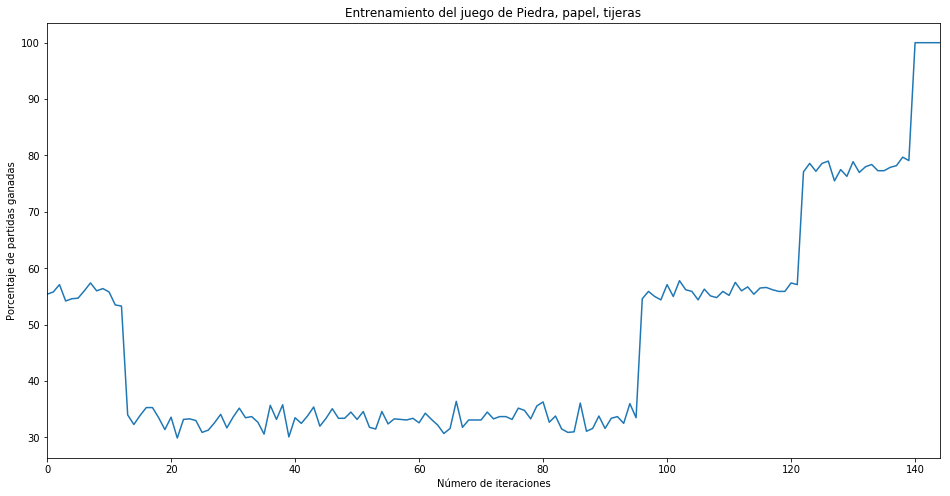

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, i)


fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(x, hist["porc_victorias"])

plt.title("Entrenamiento del juego de Piedra, papel, tijeras")
plt.xlabel("Número de iteraciones")
plt.ylabel("Porcentaje de partidas ganadas")
plt.xlim(x[0], x[-1])

plt.show()

### Datos de la red neuronal:

In [6]:
# Clases del modelo (3 en este caso)
print(model.classes_)

# Número de iteraciones que ha ejecutado el clasificador
print(model.n_iter_)

# Número de capas del modelo
print(model.n_layers_)

# Número de salidas
print(model.n_outputs_)

[0 1 2]
345
3
3


_____________________


### <center>Capítulo anterior: [**Perceptrón multicapa**](http://nbviewer.jupyter.org/github/mondeja/fullstack/blob/master/backend/src/analisis_de_datos/machine_learning/redes_neuronales/003-multilayer_perceptron.ipynb) <center>

________________

> Fuentes:
- [Piedra Tijeras Papel - Red neuronal en Python](https://www.youtube.com/watch?v=eZpSGS7vF5Y)